<a href="https://colab.research.google.com/github/Jadeilson08/tcc-data-science/blob/master/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapas:

- [x] Obtenha os dados de preço histórico de Bitcoin e Ethereum em um formato de tabela (por exemplo, CSV).
- [x] Obtenha os dados do valor do dolar por dia
- [x] Utilize a biblioteca Pandas para carregar e manipular os dados.
- [ ] Utilize a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
- [ ] Utilize a biblioteca de aprendizado de máquina scikit-learn para dividir os dados em conjuntos de treinamento e teste.
- [ ] Escolha um modelo de aprendizado de máquina apropriado para séries temporais (por exemplo, ARIMA, SARIMA, Prophet) e treine-o com os dados de treinamento.
- [ ] Faça previsões com o modelo treinado utilizando os dados de teste e avaliar a precisão do modelo.
- [ ] Utilize o modelo treinado para fazer previsões futuras.

In [1]:
# importando o data_reader
!pip install -q yfinance
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

In [2]:
# criptomoedas analisadas: Bitcoin(BTC-USD), Ethereum(ETH-USD), Tether(USDT-USD), BNB(BNB)

#data inicial e final
start_date = '2017-08-01'
end_date = '2021-08-01'

# coletando os dataframe
df_bitcoin = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)
df_ethereum = pdr.get_data_yahoo('ETH-USD', start=start_date, end=end_date)
df_tether = pdr.get_data_yahoo('USDT-USD', start=start_date, end=end_date)
df_bnb = pdr.get_data_yahoo('BNB', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# o index de todos os dataframe ja sao as datas, sem necessidade de atualizar o indice
df_bitcoin.info()
#df_ethereum.info()
#df_tether.info()
#df_bnb.info()
''' etapa 1 realizada '''

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2017-08-01 to 2021-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1461 non-null   float64
 1   High       1461 non-null   float64
 2   Low        1461 non-null   float64
 3   Close      1461 non-null   float64
 4   Adj Close  1461 non-null   float64
 5   Volume     1461 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.9 KB


' etapa 1 realizada '

In [14]:
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1324669952
2017-08-02,2727.129883,2762.530029,2668.590088,2710.669922,2710.669922,1094950016
2017-08-03,2709.560059,2813.310059,2685.139893,2804.729980,2804.729980,804796992
2017-08-04,2806.929932,2899.330078,2743.719971,2895.889893,2895.889893,1002120000
2017-08-05,2897.629883,3290.010010,2874.830078,3252.909912,3252.909912,1945699968


In [ ]:
''' 
  etapa 2
  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv
  no seguinte endereco
  https://br.investing.com/currencies/usd-brl-historical-data

'''

In [ ]:
df_dolar = pd.read_csv('https://raw.githubusercontent.com/Jadeilson08/tcc-data-science/master/USD_BRL_20170801_20210801.csv')

#precisa mudar o index para a colula Data
df_dolar.info()

In [15]:
from numpy import float64
#alterando o index para Data
df_dolar = df_dolar.set_index('Data')

#renomeando colunas para ingles
df_dolar = df_dolar.rename(columns={'Último': 'dolar_close', 'Abertura': 'dolar_open', 'Máxima': 'dolar_high', 'Mínima': 'dolar_low', 'Vol.' : 'dolar_volume', 'Var%': 'dolar_variation'})

#convertando BR para US
columns = ['dolar_close', 'dolar_open', 'dolar_high', 'dolar_low']

for column in columns:
  df_dolar[column] = df_dolar[column].apply(lambda x: x.replace(',', '.')).astype(float64)

In [16]:
df_dolar.head()

,Close,Open,High,Low,Volume,Variation
Data,,,,,,
30.07.2021,5.2123,5.0773,5.2287,5.0754,"89,74K","2,58%"
29.07.2021,5.0812,5.1165,5.1165,5.0406,"92,46K","-0,67%"
28.07.2021,5.1157,5.1710,5.1926,5.1040,"112,11K","-1,03%"
27.07.2021,5.1690,5.1769,5.2061,5.1486,"92,09K","-0,14%"
26.07.2021,5.1761,5.2051,5.2304,5.1516,"68,85K","-0,47%"


In [ ]:
'''fim etapa 2 e 3 '''

In [9]:
'''
  etapa 4:

  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
'''

'\n  etapa 4:\n\n  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.\n'

<AxesSubplot:title={'center':'Bitcoin DataSet'}, xlabel='Date'>

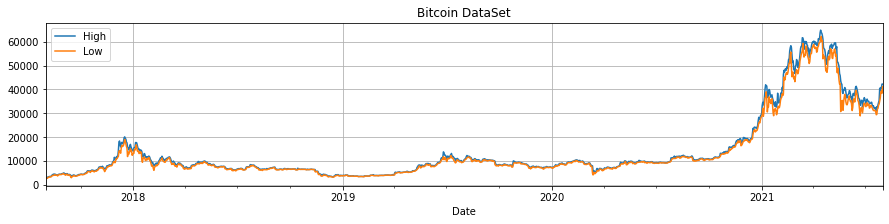

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#plotando bitcoin
df_bitcoin[['High', 'Low']].plot(figsize=(15, 3), title='Bitcoin DataSet', grid=True)

<AxesSubplot:title={'center':'Dolar DataSet'}, xlabel='Data'>

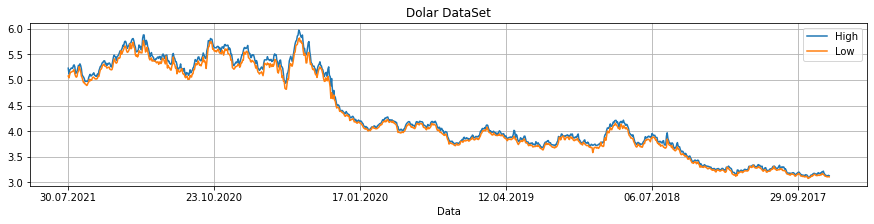

In [18]:
#plotando dolar

df_dolar[['High', 'Low']].plot(figsize=(15, 3), title='Dolar DataSet', grid=True)

In [ ]:
df_bitcoin_dolar = 